In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_Le Quang Anh Tu/week3/Chapter6'

/content/gdrive/My Drive/LDS8_Le Quang Anh Tu/week3/Chapter6


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#one in one out

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Ex1
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)



In [ ]:
np.random.seed(7)

In [ ]:
df = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset  = df.values
dataset =  dataset.astype('float32')
dataset[:5]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [ ]:
#slipt into train and test
train_size = int(len(dataset) * 0.67)
#test size = len(dataset) - trainsize
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]


In [ ]:
#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
#reshape input to be [samples, time steps, feature]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))#so luong mau, time = 1, so feature cau trainX
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))#1 cot vao va 1 cot ra
model.add(Dense(1)) #do ra co 1 gia tri

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Giải thíc tham so param
* lstm_1(LSTM)= [(num_units + input_dim +1) x num_units] x 4= [(4+1+1)x4]x4= 96
* dense_1 = ((current layer n x previous layer n)+bias) = 1x4 + 1=5

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainX, epochs= 100,batch_size=1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 11/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 12/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 13/100
94/94 [=================

In [ ]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
#invert predict(tra lại kết quả cũ trước khi scaler)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testPredict)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#calculate predict
train_score = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train score: %.2f RMSE" % (train_score))
test_score = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test score: %.2f RMSE" % (test_score))

Train score: 23.16 RMSE


ValueError: ignored

In [ ]:
testY.shape

(46, 1)

In [ ]:
testPredict.shape

(46, 1)

In [ ]:
#shift train predict for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
#shift test predict for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2)+1:len(dataset)-1, :] = testPredict

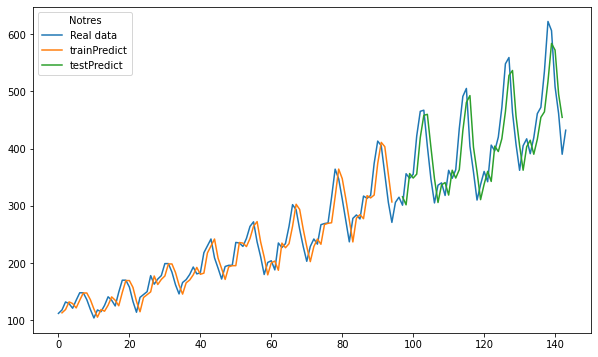

In [ ]:
#plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label = 'Real data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title='Notres')
plt.show()

In [ ]:
#x_new = 432 => next time
x_new = scaler.transform([[432]])
x_new = np.reshape(x_new, (1,1,1))

y_new = model.predict(x_new)
y_new = scaler.inverse_transform(y_new)
y_new

array([[428.32935]], dtype=float32)